# Exercise 7

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import stats

In [3]:
df = pd.read_csv ('EFIplus_medit.zip',compression="zip", sep= ";")
df

,Site_code,Latitude,Longitude,Country,Catchment_name,Galiza,Subsample,Calib_EFI_Medit,Calib_connect,Calib_hydrol,...,Squalius malacitanus,Squalius pyrenaicus,Squalius torgalensis,Thymallus thymallus,Tinca tinca,Zingel asper,Squalius sp,Barbatula sp,Phoxinus sp,Iberochondrostoma_sp
0,ES_01_0002,38.102003,-4.096070,Spain,Guadalquivir,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,ES_02_0001,40.530188,-1.887796,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,ES_02_0002,40.595432,-1.928079,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,ES_02_0003,40.656184,-1.989831,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,ES_02_0004,40.676402,-2.036274,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5006,PTVO60,40.641612,-8.325149,Portugal,Vouga,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5007,PTVO61,40.729015,-8.098851,Portugal,Vouga,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5008,PTVO62,40.727959,-8.107344,Portugal,Vouga,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5009,PTVO63,40.817783,-8.224903,Portugal,Vouga,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Ex 1:


 Check visually if any of the continuous environmental variables in the EFIplus_medit dataset (Altitude,
Actual_river_slope, Elevation_mean_catch, prec_ann_catch, temp_ann, temp_jan, temp_jul) would
require a data transformation in order to apply parametric tests.

In [4]:
variab = [
    'Altitude',
    'Actual_river_slope',
    'Elevation_mean_catch',
    'prec_ann_catch',
    'temp_ann',
    'temp_jan',
    'temp_jul']

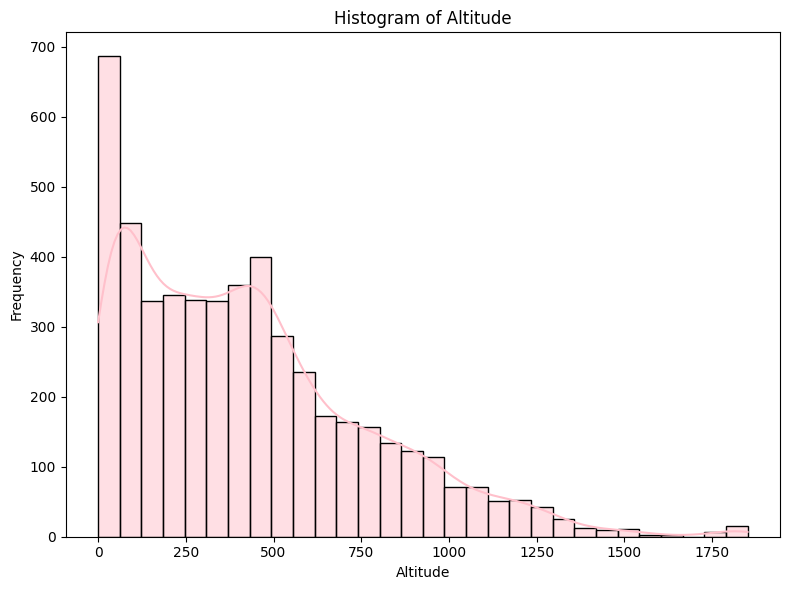

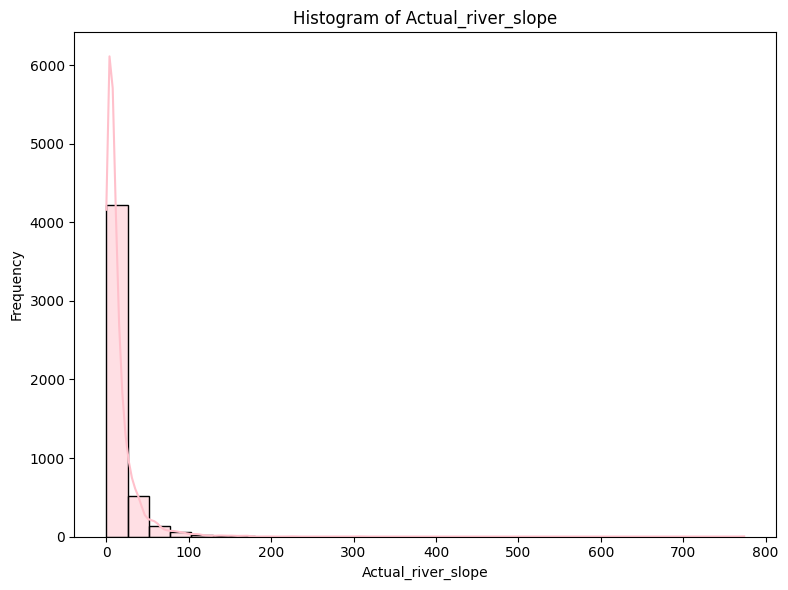

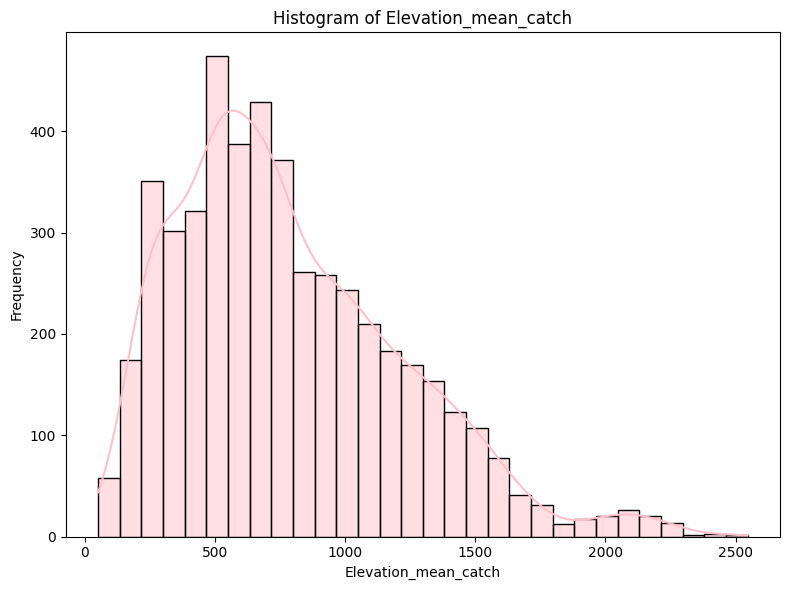

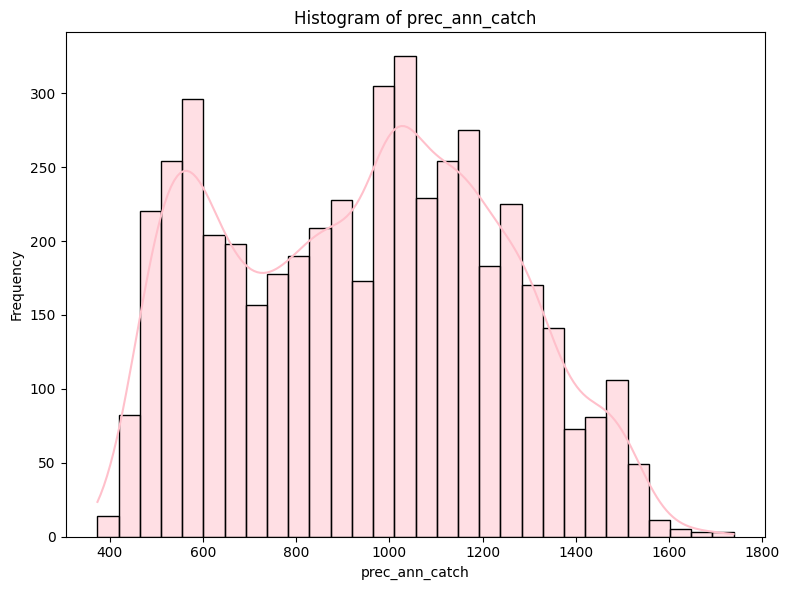

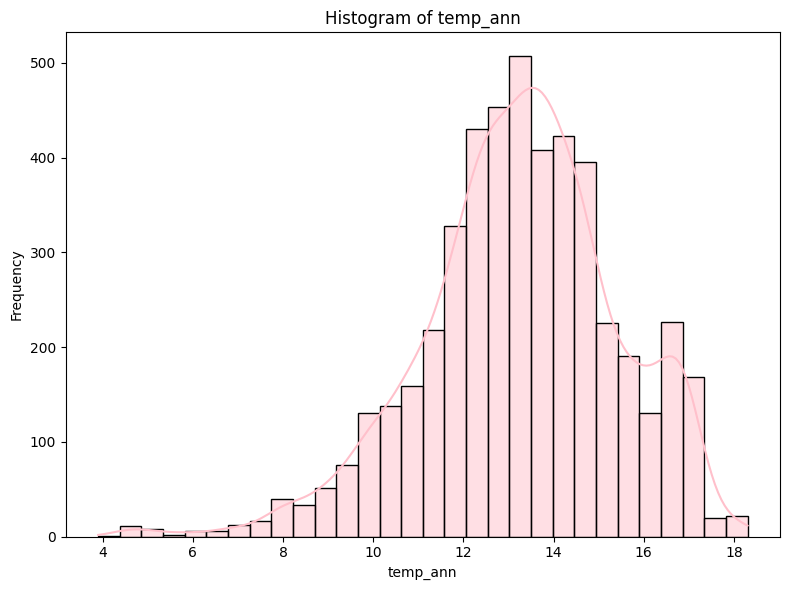

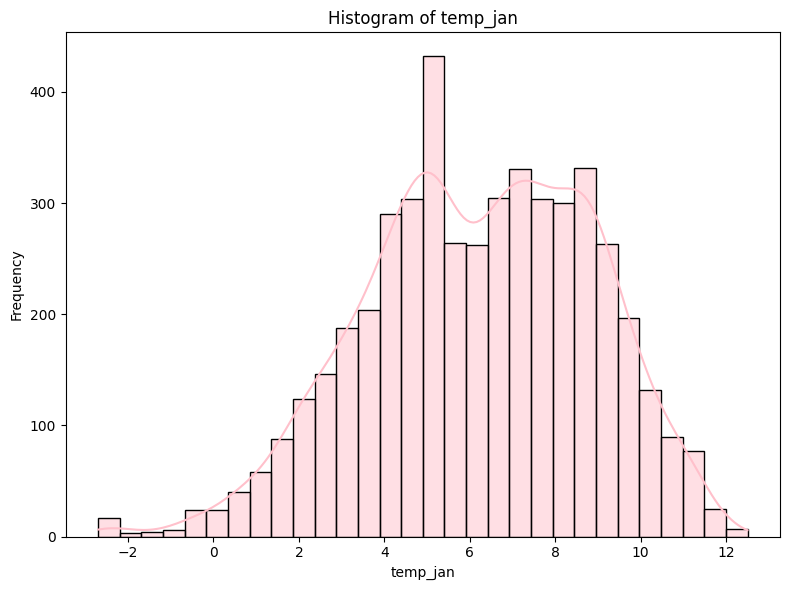

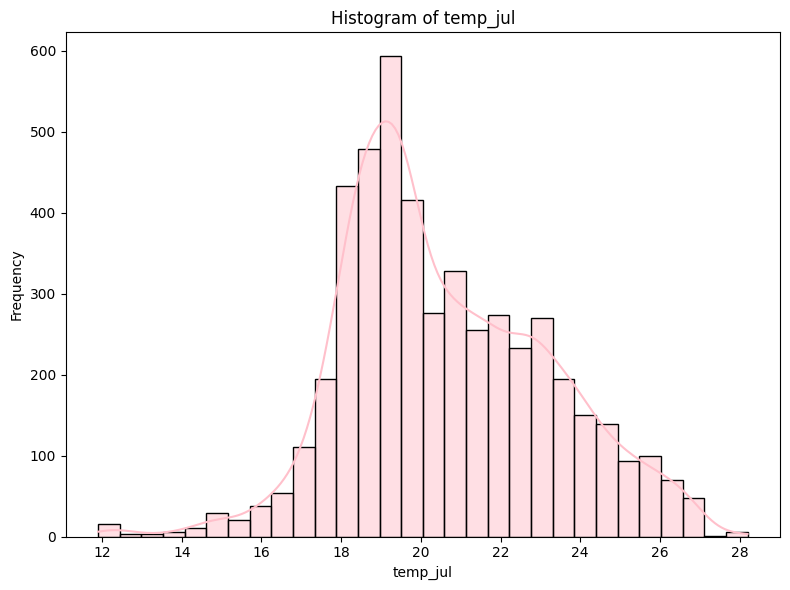

In [5]:
for var in variab:
    data = df[var].dropna()

    plt.figure(figsize=(8, 6))

    # Histogram with KDE
    sns.histplot(data, kde=True, color="pink", bins=30)
    plt.title(f"Histogram of {var}")
    plt.xlabel(var)
    plt.ylabel('Frequency')


    plt.tight_layout()
    plt.show()

### Ex 2:

 Apply the appropriate data transformation and check the new distributions.

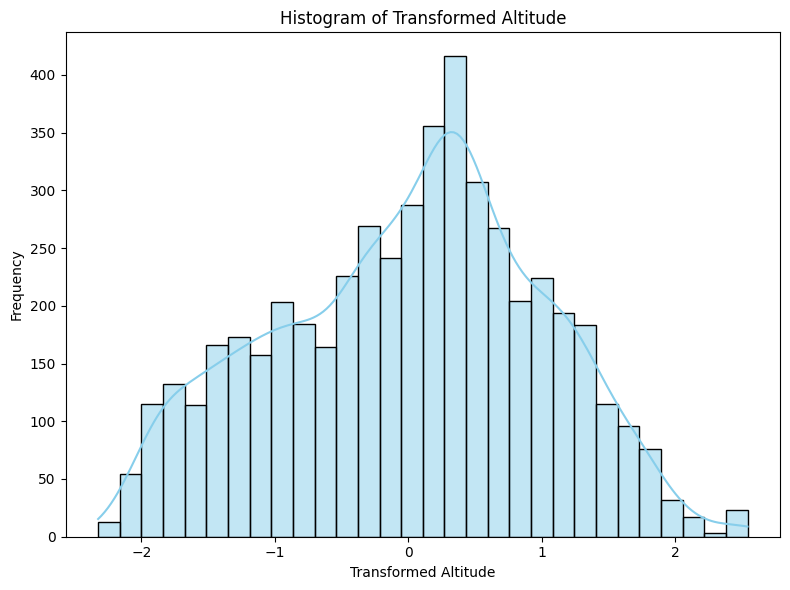

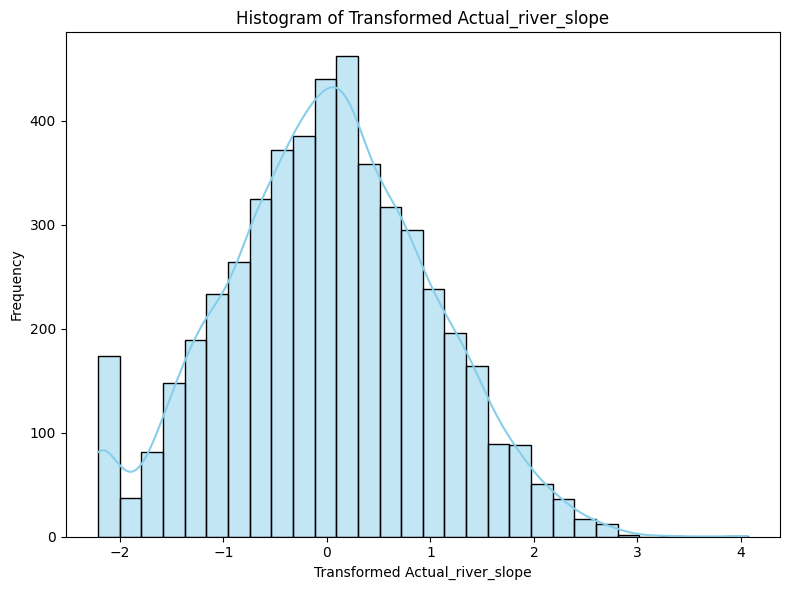

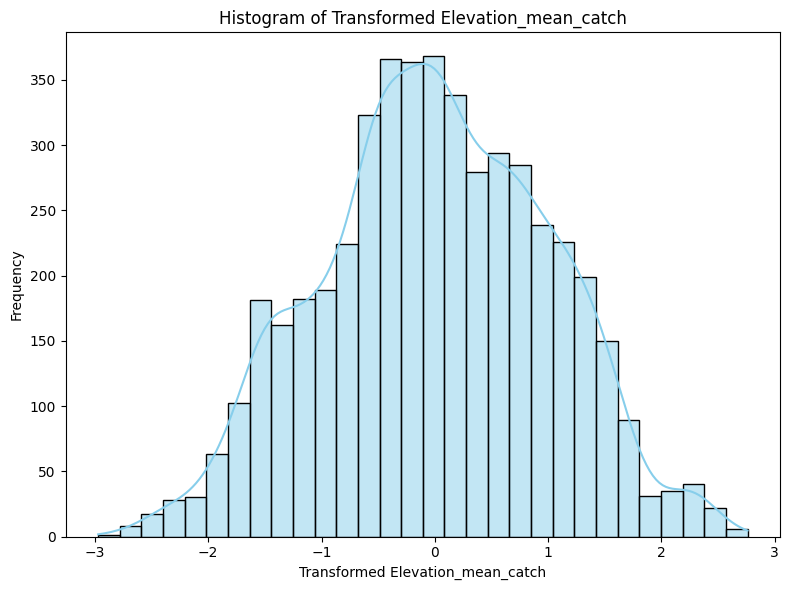

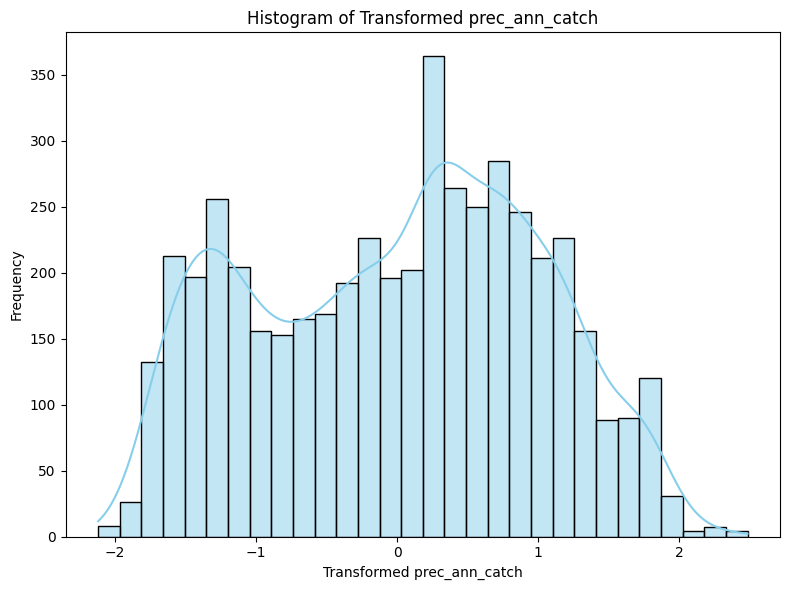

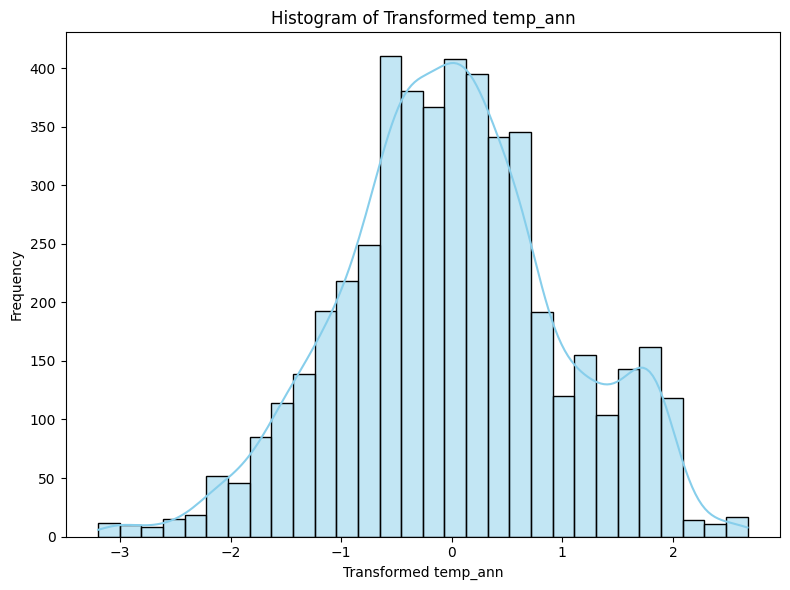

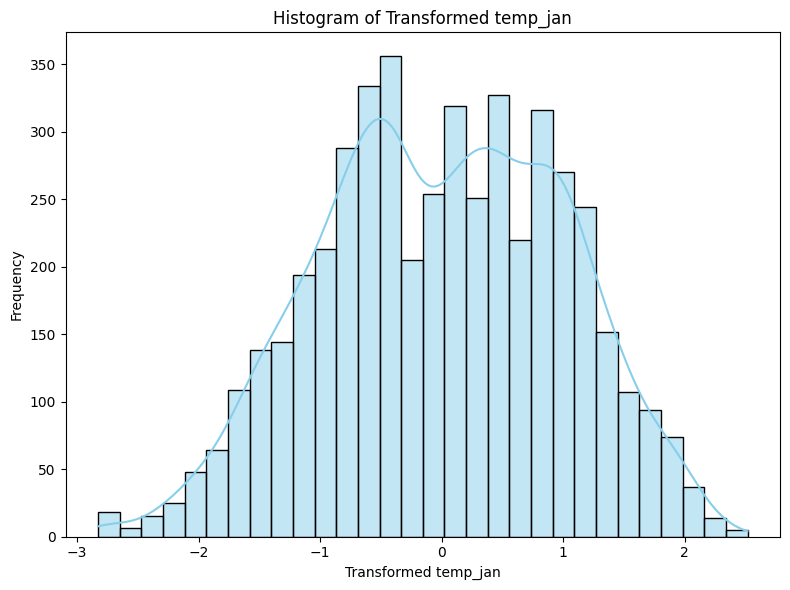

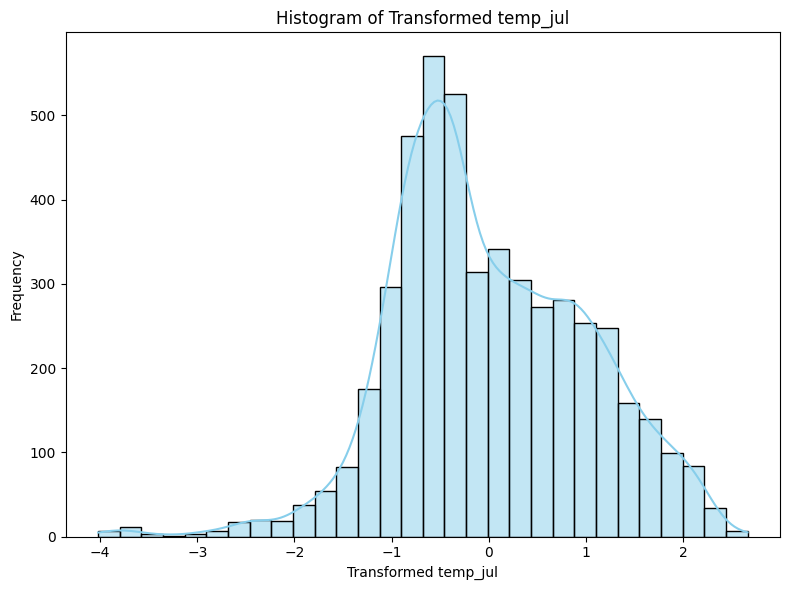

In [11]:

from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson', standardize=True)

transformed_df = df.copy()

for var in variab:
    # Reshape the data as PowerTransformer expects a 2D array
    data = df[var].dropna().values.reshape(-1, 1)

    # Apply the transformation
    transformed_data = pt.fit_transform(data)

    
    temp_series = pd.Series(transformed_data.flatten(), index=df[var].dropna().index)
    transformed_df[var] = temp_series.reindex(df.index)


# Check the distributions after transformation
for var in variab:
    data = transformed_df[var].dropna()

    plt.figure(figsize=(8, 6))

    # Histogram with KDE
    sns.histplot(data, kde=True, color="skyblue", bins=30)
    plt.title(f"Histogram of Transformed {var}")
    plt.xlabel(f"Transformed {var}")
    plt.ylabel('Frequency')


    plt.tight_layout()
    plt.show()



### Ex 3:

Create a column with the total number of species present (the species richness) in each sampling site
(NOTE: the first species in the dataset is ‘Abramis brama’ and all the columns to the right correspond to
species presence/absence).

In [12]:
# Assuming 'Abramis brama' is the first species column and all subsequent columns are species
species_cols = df.columns[df.columns.get_loc('Abramis brama'):]

# Calculate the sum of presence/absence for each row (site)
df['species_richness'] = df[species_cols].sum(axis=1)


print(df[['Site_code', 'species_richness']].head())

    Site_code  species_richness
0  ES_01_0002                 3
1  ES_02_0001                 3
2  ES_02_0002                 3
3  ES_02_0003                 6
4  ES_02_0004                 6


### Ex 4:

Check the existence of bivariate outliers in the relationship between Mean Annual Temperature
(‘temp_ann’) and species richness using an appropriate plot. Run a bivariate isolation forest to detect
outliers and plot the result.

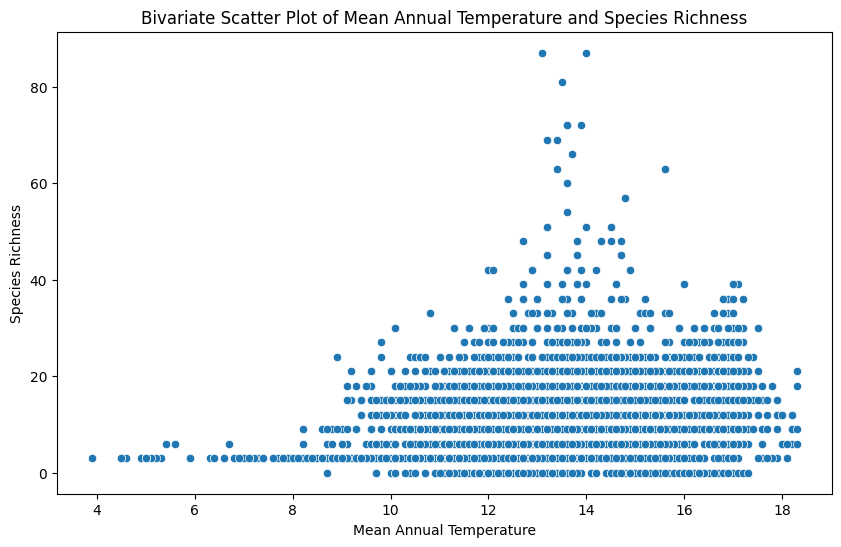

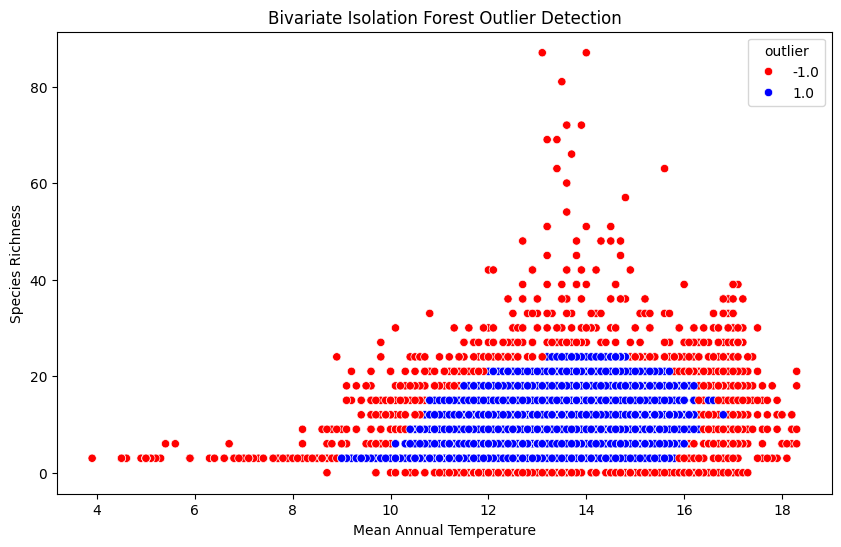

In [13]:
from sklearn.ensemble import IsolationForest

# Check for bivariate outliers using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp_ann', y='species_richness', data=df)
plt.title('Bivariate Scatter Plot of Mean Annual Temperature and Species Richness')
plt.xlabel('Mean Annual Temperature')
plt.ylabel('Species Richness')
plt.show()


X = df[['temp_ann', 'species_richness']].dropna()

# Fit the Isolation Forest model
model = IsolationForest(n_estimators=100, contamination='auto', random_state=42)
model.fit(X)

# Predict outliers (-1 for outliers, 1 for inliers)
outlier_predictions = model.predict(X)
# Add the outlier predictions to the original DataFrame
df_with_outliers = df.copy()
df_with_outliers['outlier'] = pd.Series(outlier_predictions, index=X.index)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp_ann', y='species_richness', hue='outlier', data=df_with_outliers, palette={1: 'blue', -1: 'red'})
plt.title('Bivariate Isolation Forest Outlier Detection')
plt.xlabel('Mean Annual Temperature')
plt.ylabel('Species Richness')
plt.show()


### Ex 5:

Explore visually, using a single plot, if this relationship (temp_ann x species richness) may vary across
countries.

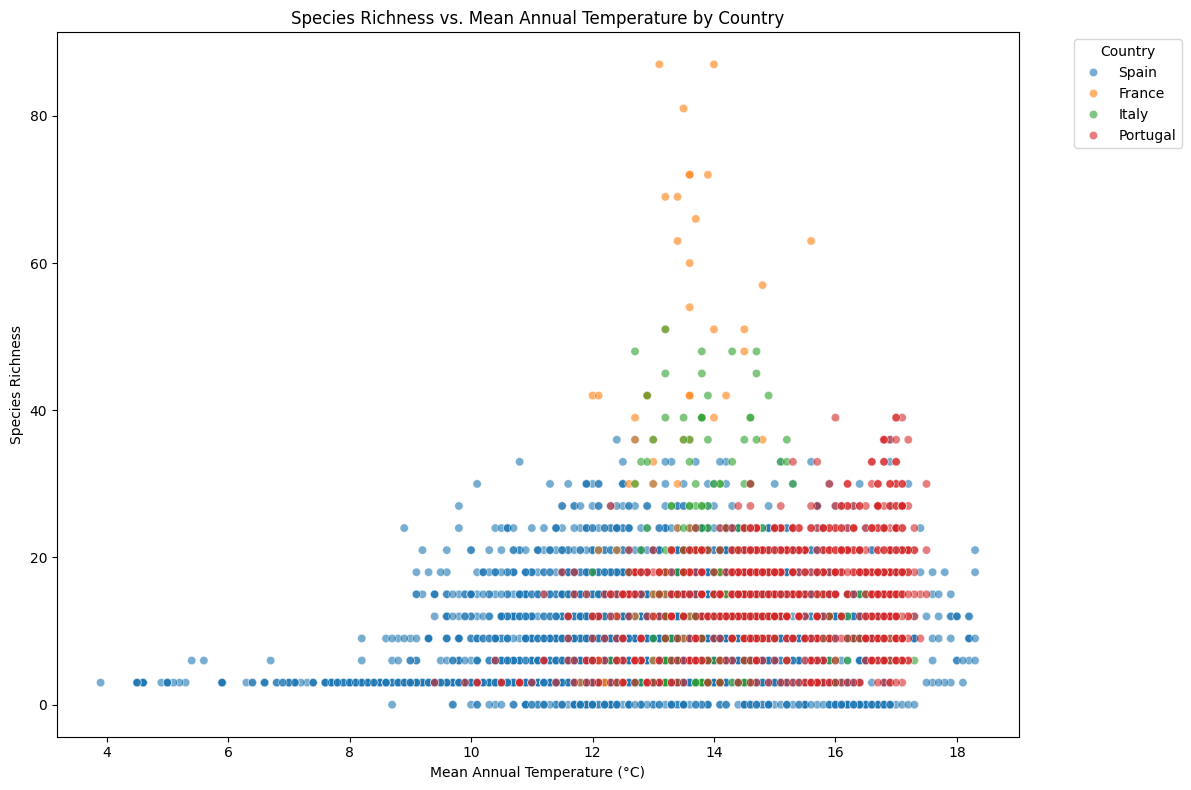

In [14]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='temp_ann', y='species_richness', hue='Country', data=df, alpha=0.6)
plt.title('Species Richness vs. Mean Annual Temperature by Country')
plt.xlabel('Mean Annual Temperature (°C)')
plt.ylabel('Species Richness')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()